In [1]:
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Change the working directory to the parent directory
os.chdir(parent_dir)

# Imports

In [19]:
%load_ext autoreload
%autoreload 2

import datetime

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

from dataloader.load_regression_data_from_arbitrary_gp_varying_kernel import RegressionDataGeneratorArbitraryGPWithVaryingKernel

from utils.plot import plot_learning_curve
from utils.plot import plot_gp_vs_cnp_vs_lnp_varying_kernel

from utils.gaussian_processes.gp_model import plot_mean_with_std
from utils.gaussian_processes.plot_gp_utils import plot_preds_from_ds_test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DataGenerator

In [20]:
data_generator = RegressionDataGeneratorArbitraryGPWithVaryingKernel(
    iterations=25,
    batch_size=32,
    min_num_context=3,
    max_num_context=40,
    min_num_target=2,
    max_num_target=40,
    min_x_val_uniform=-2,
    max_x_val_uniform=2,
    min_kernel_length_scale=0.1,
    max_kernel_length_scale=1.
)

In [21]:
(context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))

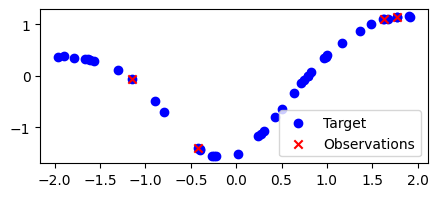

In [22]:
data_generator.plot_first_elt_of_random_batch(figsize=(5, 2));

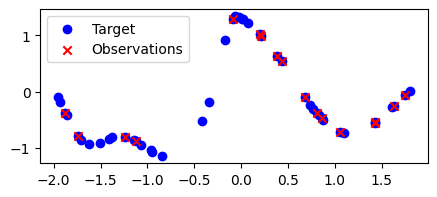

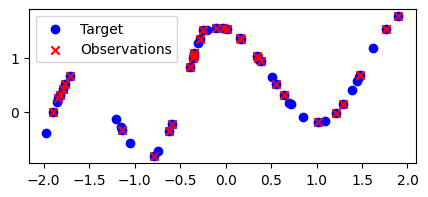

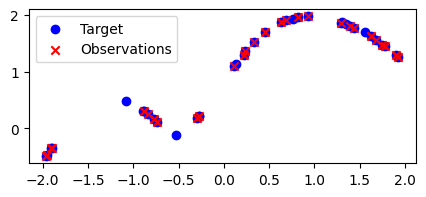

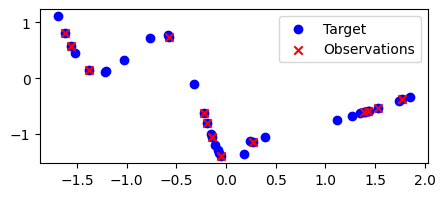

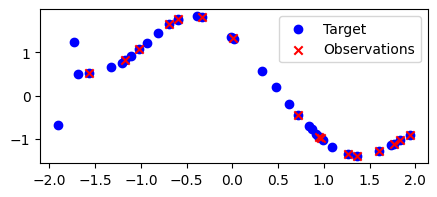

In [27]:
for (context_x, context_y, target_x), target_y in data_generator.train_ds.take(5):
    RegressionDataGeneratorArbitraryGPWithVaryingKernel.plot_first_elt_of_batch(context_x, context_y, target_x, target_y,
                                                                                figsize=(5, 2));